In [1]:
%load_ext autoreload
%autoreload 2

import sys
#from spikeA.Dat_file_reader import Dat_file_reader

# This sets up our session lists
%run setup_project.py
print("autpipy sessions: {}, spikeA sessions: {}".format(len(myProject.sessionList),len(sSesList)))

Project name: autopi_ca1
dataPath: /adata/projects/autopi_ca1
dlcModelPath: /adata/models
Reading /adata/projects/autopi_ca1/sessionList
We have 36 testing sessions in the list
See myProject and sSesList objects
autpipy sessions: 36, spikeA sessions: 36


In [2]:
def prepareSpikeASession(sSes):
    sSes.load_parameters_from_files() 
for sSes in sSesList:
    prepareSpikeASession(sSes)

In [3]:
sSesLocal = get_local_sessions(sSesList)
ip=socket.gethostname()
print("{} sessions are local to {}".format(len(sSesLocal),ip))

30 sessions are local to a230-pc73


In [4]:
sSes = sSesLocal[0]

In [5]:
ap = Animal_pose(sSes)
ap.load_pose_from_file()
stl = Spike_train_loader()
stl.load_spike_train_kilosort(sSes)
cg = Cell_group(stl)

Loading original pose from /adata/projects/autopi_ca1/TYY5622/TYY5622-20092021-0106/TYY5622-20092021-0106.pose.npy
Number of good clusters: 30


In [6]:
from spikeA.Spike_waveform import Spike_waveform
from spikeA.Dat_file_reader import Dat_file_reader

n = cg.neuron_list[0]
dat_files = [ sSes.path+"/"+i+".dat" for i in sSes.trial_names]
st = n.spike_train


In [7]:
dfr = Dat_file_reader(file_names = dat_files,n_channels=sSes.n_channels) # with list of .dat files
swf1 = Spike_waveform(session = sSes, dat_file_reader=dfr, spike_train=st)
swf1.mean_waveform(block_size=100, channels=np.arange(sSes.n_channels-1), n_spikes=None)


n_spikes: 39819, read from file 0 to file 5, shape: (128, 100, 39819)


In [11]:
dfr = Dat_file_reader(file_names = [sSes.path+"/"+sSes.name+".dat"],n_channels=sSes.n_channels) # with single .dat file
swf2 = Spike_waveform(session = sSes, dat_file_reader=dfr, spike_train=st)
swf2.mean_waveform(block_size=100, channels=np.arange(sSes.n_channels-1), n_spikes=None)

n_spikes: 94416, read from file 0 to file 0, shape: (32, 100, 94416)


In [13]:
np.sum(swf1.mean_waveforms==swf2.mean_waveforms)

3200

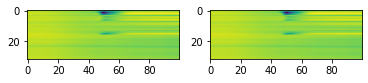

In [15]:
fig, axes = plt.subplots(1,2)
axes[0].imshow(swf1.mean_waveforms)
axes[1].imshow(swf2.mean_waveforms)